**[MSE-01]** 모듈을 임포트하고 난수의 시드를 설정한다.

In [1]:
%tensorflow_version 1.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160604)

TensorFlow 1.x selected.


**[MSE-02]** MNIST 데이터 세트를 준비한다.

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

**[MSE-03]** 소프트맥스 함수에 의한 확률 p 계산식을 준비한다.

In [3]:
num_units = 1024

x = tf.placeholder(tf.float32, [None, 784])

w1 = tf.Variable(tf.truncated_normal([784, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w0 = tf.Variable(tf.zeros([num_units, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden1, w0) + b0)

**[MSE-04]** 오차 함수 loss와 트레이닝 알고리즘 train_step을 준비한다.

In [4]:
t = tf.placeholder(tf.float32, [None, 10])
#loss = -tf.reduce_sum(t * tf.log(p)) 
loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=p, labels=tf.stop_gradient(t)))
train_step = tf.train.AdamOptimizer().minimize(loss)

**[MSE-05]** 정답률 accuracy를 정의한다.

In [5]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**[MSE-06]** 세션을 준비하고 Variable을 초기화한다.

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

**[MSE-07]** 

In [7]:
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)
print("num_iterations = %d" %(num_iterations))

epoch = 0
for _ in range(num_epochs):
    epoch += 1
    avg_loss = 0 
    avg_accuracy = 0
    
    for iteration in range (num_iterations):
      batch_xs, batch_ts = mnist.train.next_batch(batch_size)
      _, loss_val, acc_val = sess.run([train_step, loss, accuracy], feed_dict={x: batch_xs, t: batch_ts})
      avg_loss += loss_val / num_iterations
      avg_accuracy += acc_val / num_iterations
      
    print("Epoch : %04d,  Loss: %0.9f,  Accuracy: %0.9f" %(epoch, avg_loss, avg_accuracy))
 
print("Learning Finished")
  
#Test model and check accuracy
print( "Accuracy:", sess.run(accuracy, feed_dict={x:mnist.test.images, t:mnist.test.labels}))

num_iterations = 550
Epoch : 0001,  Loss: 1.635482809,  Accuracy: 0.829509089
Epoch : 0002,  Loss: 1.597457968,  Accuracy: 0.863999999
Epoch : 0003,  Loss: 1.587853947,  Accuracy: 0.872800000
Epoch : 0004,  Loss: 1.543918503,  Accuracy: 0.917672729
Epoch : 0005,  Loss: 1.492252649,  Accuracy: 0.969909098
Epoch : 0006,  Loss: 1.485963105,  Accuracy: 0.975927282
Epoch : 0007,  Loss: 1.481970295,  Accuracy: 0.980236376
Epoch : 0008,  Loss: 1.478976554,  Accuracy: 0.983018192
Epoch : 0009,  Loss: 1.477490346,  Accuracy: 0.984290919
Epoch : 0010,  Loss: 1.476192087,  Accuracy: 0.985363647
Epoch : 0011,  Loss: 1.474557022,  Accuracy: 0.987054555
Epoch : 0012,  Loss: 1.473748869,  Accuracy: 0.987618191
Epoch : 0013,  Loss: 1.471996016,  Accuracy: 0.989581827
Epoch : 0014,  Loss: 1.471549116,  Accuracy: 0.990018190
Epoch : 0015,  Loss: 1.470817632,  Accuracy: 0.990781826
Epoch : 0016,  Loss: 1.470840466,  Accuracy: 0.990836372
Epoch : 0017,  Loss: 1.469672324,  Accuracy: 0.991836371
Epoch : 00

**[MSE-08]** 이 시점의 파라미터를 이용해 테스트 세트에 대한 예측을 출력한다.

여기서는 '0' ~ '9'의 숫자에 대해 정답과 오답 예를 3개씩 출력한다.

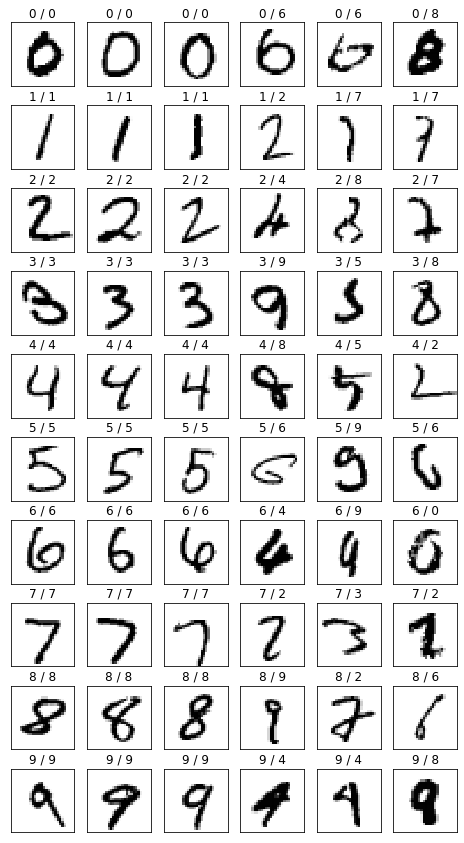

In [8]:
#@title
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t: labels}) 

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break